In [11]:
from hp_lattice import Lattice_HP_QUBO
from dimod.utilities import qubo_to_ising
from dwave.samplers import SimulatedAnnealingSampler

In [12]:
def simulated_annealing_qubo(model, num_samples=10):
    Q_qubo = model.interaction_matrix()
    h_ising, J_ising, offset_ising = qubo_to_ising(Q_qubo)

    sampler = SimulatedAnnealingSampler()

    mysamples = []
    energies = []
    betas = [1.05**j for j in range(25)]
    
    for i in range(num_samples):
        sampleset = sampler.sample_ising(
            h_ising, J_ising,
            offset=offset_ising,
            beta_schedule_type='custom',
            beta_schedule=betas,
            beta_range=[min(betas), max(betas)],
            num_sweeps_per_beta=100_000,
            num_reads=1,
            )
        sample0 = sampleset.record[0]
        q = (sample0.sample + 1) / 2
        energies.append(sum(model.get_energies(q)))
        mysamples.append(q)

    # get single sample with lowest energy
    min_energy = min(energies)
    print(f"min energy: {round(min_energy, 1)}")
    min_idx = energies.index(min_energy)
    min_sample = mysamples[min_idx]
    model.show_lattice(min_sample)

## $S_4$

min energy: -1.0


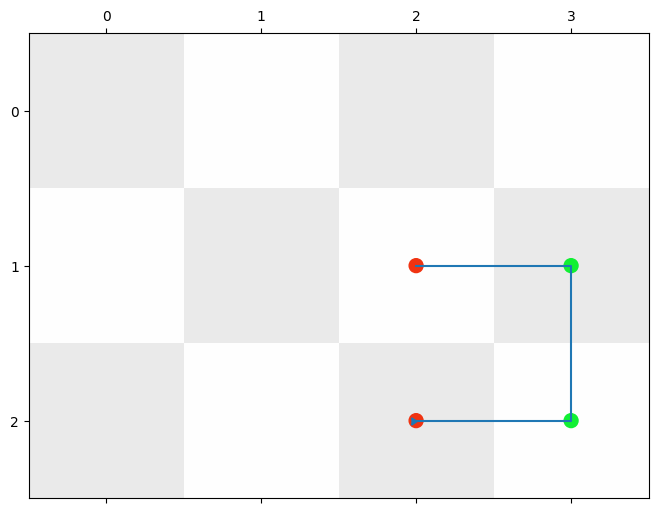

In [13]:
model = Lattice_HP_QUBO(
    dim = [3, 4],
    sequence="HPPH",
    Lambda=(2.1, 2.4, 3.0),
    is_printing=False,
)

simulated_annealing_qubo(model)

## $S_{10}$

min energy: -4.0


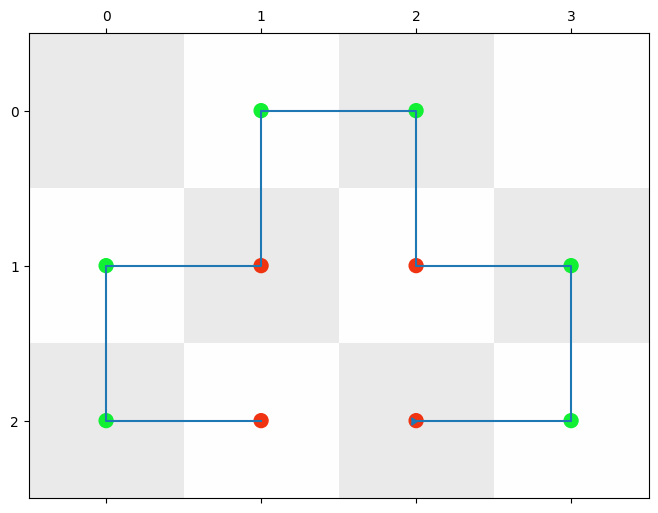

In [14]:
model = Lattice_HP_QUBO(
    dim = [3, 4],
    sequence="HPPHPPHPPH",
    Lambda=(2.1, 2.4, 3.0),
    is_printing=False,
)

simulated_annealing_qubo(model, num_samples=2)

## $S_{14}$

min energy: -5.0


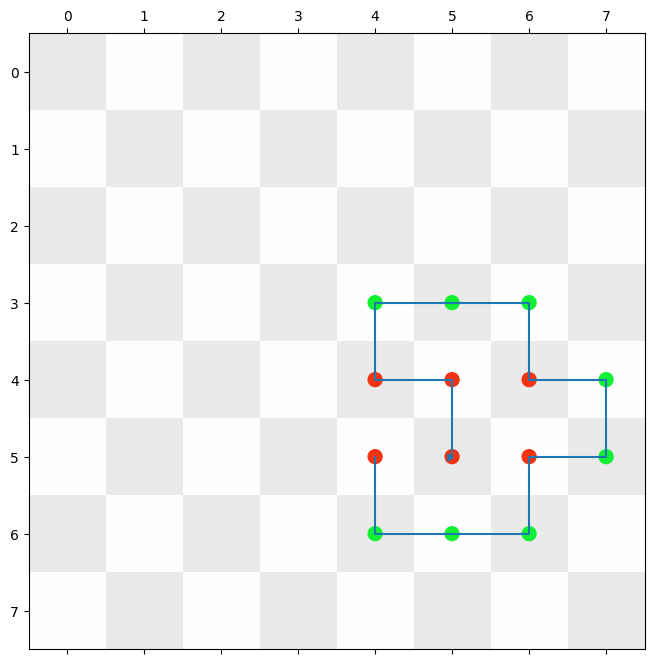

In [24]:
model = Lattice_HP_QUBO(
    dim = [8, 8],
    sequence="HHHPPPHPPHPPPH",
    Lambda=(2., 3., 3.),
    is_printing=False,
)

simulated_annealing_qubo(model, num_samples=5)

## $S_{20}$

min energy: -9.0


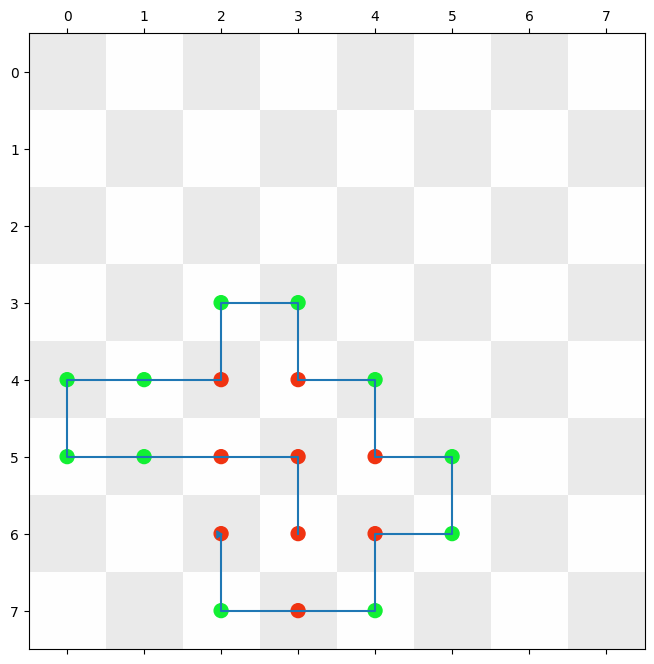

In [23]:
model = Lattice_HP_QUBO(
    dim = [8, 8],
    sequence="HPHPHPPHPHPPHPPPPHHH",
    Lambda=(2., 3., 3.),
    is_printing=False,
)

simulated_annealing_qubo(model, num_samples=5)

## $S_{28}$

min energy: -13.0


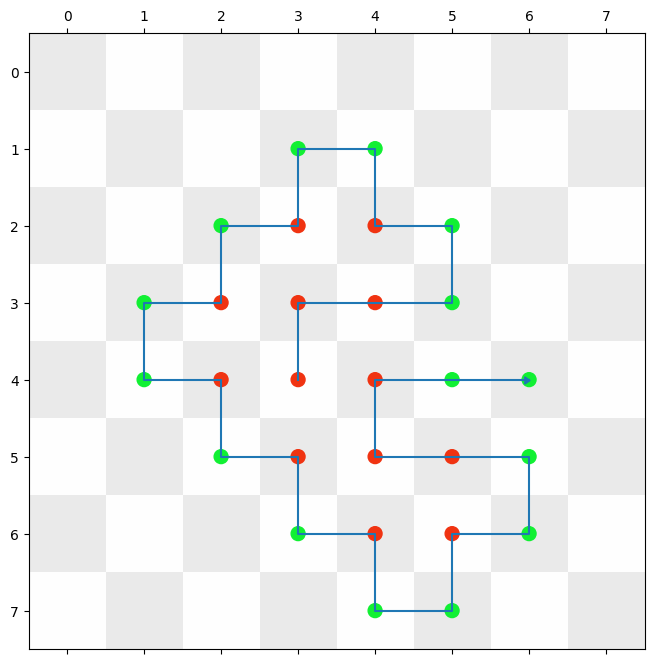

In [19]:
model = Lattice_HP_QUBO(
    dim = [8, 8],
    sequence="PPHHHPPHPPHPHPHPPHPHPPHPPHHH",
    Lambda=(2.1, 2.4, 3.0),
    is_printing=False,
)

simulated_annealing_qubo(model, num_samples=2)

## $S_{29}$

min energy: -15.0


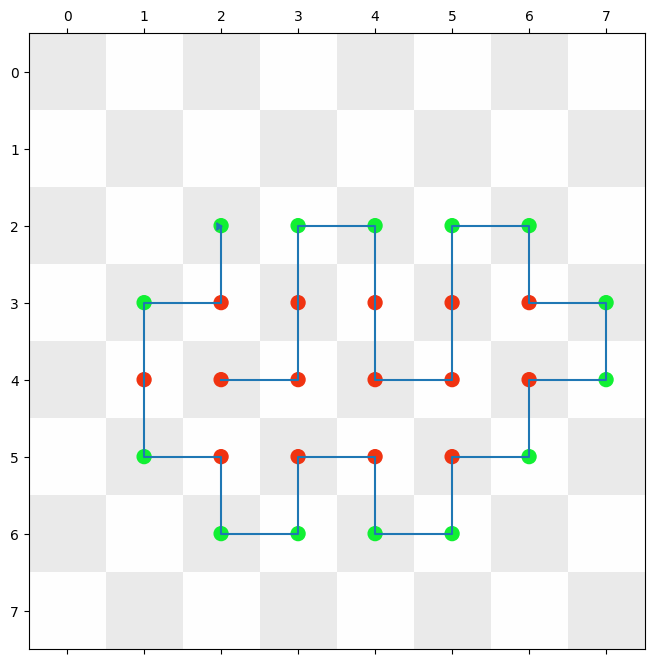

In [17]:
model = Lattice_HP_QUBO(
    dim = [8, 8],
    sequence="PHPHPHPPHHPPHPHPPHPPHHHHPPHHH",
    Lambda=(2.1, 2.4, 3.0),
    is_printing=False,
)

simulated_annealing_qubo(model, num_samples=5)

## $S_{30}$

min energy: -15.0


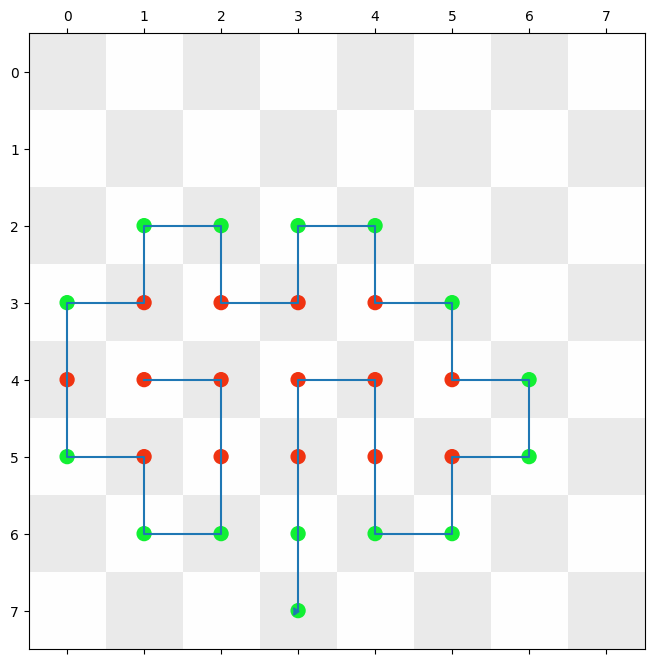

In [18]:
model = Lattice_HP_QUBO(
    dim = [8, 8],
    sequence="PPHHHHPPHPPHPHPPHHPPHPHPHPPHHH",
    Lambda=(2.1, 2.4, 3.0),
    is_printing=False,
)

simulated_annealing_qubo(model, num_samples=5)

## $S_{48}$

min energy: -18.0


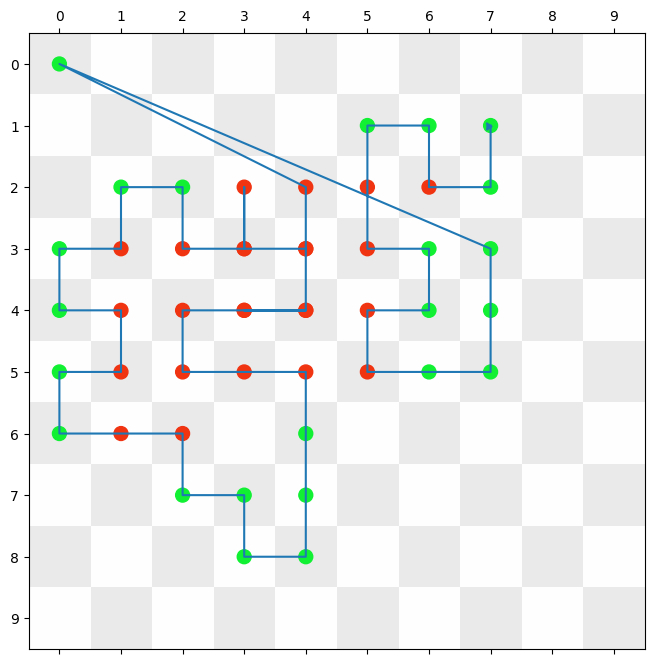

In [26]:
model = Lattice_HP_QUBO(
    dim = [10, 10],
    sequence="PPHPPHHPPHHPPPPPHHHHHHHHHHPPPPPPHHPPHHPPHPPHHHHH",
    Lambda=(2.0, 3.5, 3.0),
    is_printing=False,
)

simulated_annealing_qubo(model, num_samples=50)

## $S_{64}$

min energy: -45.0


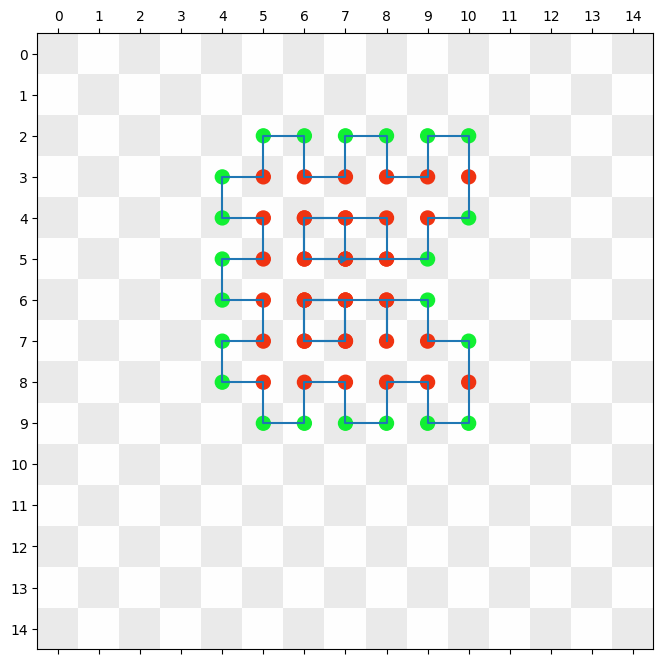

In [27]:
model = Lattice_HP_QUBO(
    dim = [15, 15],
    sequence="HHHHHHHHHHHHPHPHPPHHPPHHPPHPPHHPPHHPPHPPHHPPHHPPHPHPHHHHHHHHHHHHH",
    Lambda=(3.0, 3.0, 4.0),
    is_printing=False,
)

simulated_annealing_qubo(model, num_samples=1)